/home/zhaopenghao/.local/lib/python3.12/site-packages/cute_viz/core.py:143: DSLOptimizationWarning: This static loop has 128 iterations, which may be very slow to compile, consider using `cutlass.range(..., unroll_full=True)` instead.
  for tid in range_constexpr(num_threads):


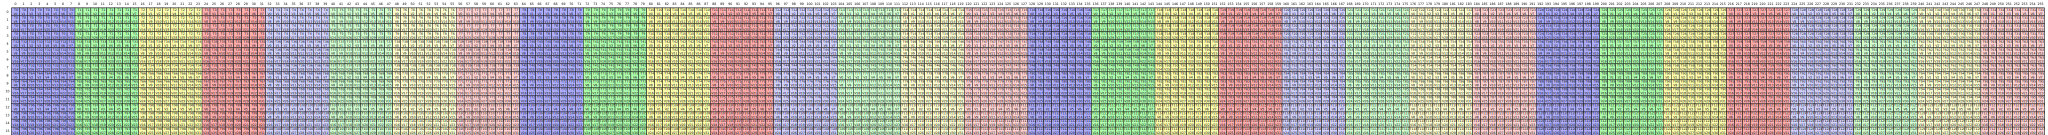

((32,4),(8,4)):((8,2048),(1,512))


In [ ]:
""" https://github.com/NVIDIA/cutlass/blob/main/examples/python/CuTeDSL/notebooks/elementwise_add.ipynb
"""
import cutlass.cute as cute
# https://github.com/NTT123/cute-viz
from cute_viz import display_tv_layout

@cute.jit
def visualize():
    # Create and render a layout to file
    # layout = cute.make_layout( ((16,16),(256,2)), stride=((512,8192),(1,256)))
    # display_layout(layout)

    tv_layout = cute.make_layout(((32, 4), (8, 4)), stride=((128, 4), (16, 1)))
    display_tv_layout(tv_layout, (16, 256))

    thr_block_layout = cute.make_layout((16, 256), stride=(512, 1))
    print(cute.composition(thr_block_layout, tv_layout))

visualize()

Why modes of thread domain of TV Layout looks swapped especially when tensor is row major?

We may notice that TV Layout in above example is ((32,4),(8,4)):((128,4),(16,1)). However, on visualization, thread indices are arrange as shape (4,32) rather than (32,4) of TV Layout.

This is a commonly asked question by developers from both internal teams and community.

It's important to keep in mind that TV Layout maps (thread_index, value_index) to (row_index, column_index) of logical domain (TileM, TileN). However, visualization shows inverse mapping of logical domain (TileM, TileN) to (thread_domain, value_domain), because this is more intuitive for human developer.

That's why the shape of domain of TV Layout doesn't necessarily match logical view.